# Random rotations mode

In [1]:
import os

os.chdir('/home/ubuntu/nndl-project/')

from src.dataset import * # import ModelNetDataset class
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

metadata_path = '/home/ubuntu/nndl-project/data/modelnet10/metadata.csv'

metadata = pd.read_csv(metadata_path,index_col=0)

int_to_label = dict(metadata.groupby(['label','label_str']).groups.keys())

metadata.head()

,filename,split,path,label,label_str
0,desk_0244.ply,test,/home/ubuntu/nndl-project/data/modelnet10/ply/...,0,desk
1,desk_0208.ply,test,/home/ubuntu/nndl-project/data/modelnet10/ply/...,0,desk
2,desk_0256.ply,test,/home/ubuntu/nndl-project/data/modelnet10/ply/...,0,desk
3,desk_0260.ply,test,/home/ubuntu/nndl-project/data/modelnet10/ply/...,0,desk
4,desk_0219.ply,test,/home/ubuntu/nndl-project/data/modelnet10/ply/...,0,desk


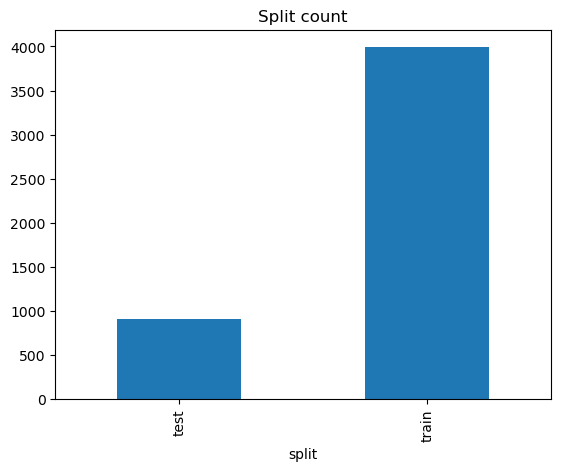

In [2]:
metadata.groupby('split').count()['filename'].plot.bar(title='Split count');

`ModelNetDataset` is a subclass of the PyTorch `DataSet` class, which is designed to work in pair with the `DataLoader` object. The `DataLoader` accepts, among the other parameters, a batch size, a shuffle option and a `num_workers` for multi processing, and returns the tensors with the added batch dimension as the first axis.

The `ModelNetDataset` class requires as an argument a metadata `.csv` file, that contains the id of each sample file, its path, its label and its split set (test or train). It also requires $N$, the resolution of the $N\times N \times N$ grid that will be used for voxelization.

In [3]:
dataset = ModelNetDataset(metadata_path=metadata_path,N=30,split='train')
loader = DataLoader(dataset,2,shuffle=True,num_workers=8)

The `DataLoader` can be casted as an iterable that yields batches.

In [4]:
voxel_batch,rot_batch,label_batch=next(iter(loader))

In [5]:
print(voxel_batch.shape)
print(rot_batch.shape)
print(label_batch.shape)

torch.Size([10, 1, 30, 30, 30])
torch.Size([10, 3])
torch.Size([10])


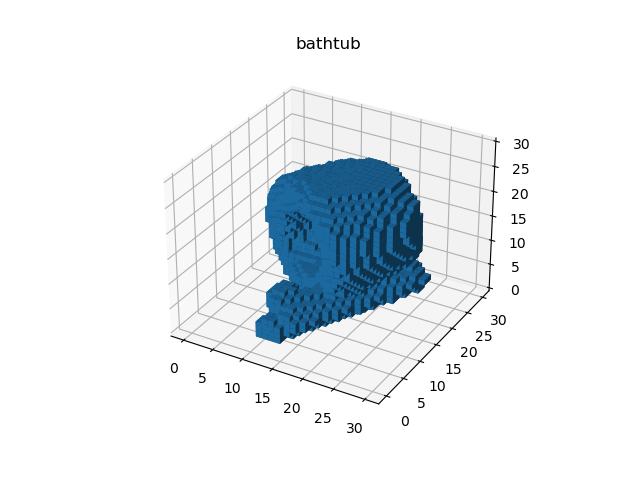

In [6]:
%matplotlib widget

i=1

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_batch[i,0])
ax.set_title(int_to_label[label_batch[i].item()])
plt.show()

# Orientation classes mode

In [7]:
# if you specify the orientation_classes metadata path, it will trigger orientation classes mode
orientation_classes_path = '/home/ubuntu/nndl-project/data/modelnet10/orientation_classes.csv'
dataset = ModelNetDataset(metadata_path=metadata_path,N=30,split='train',orientation_classes_path=orientation_classes_path)
loader = DataLoader(dataset,2,shuffle=True,num_workers=8)

In [8]:
voxel_batch,orientation_batch,label_batch=next(iter(loader))

In [9]:
print(voxel_batch.shape)
print(orientation_batch.shape)
print(label_batch.shape)

torch.Size([2, 1, 30, 30, 30])
torch.Size([2])
torch.Size([2])


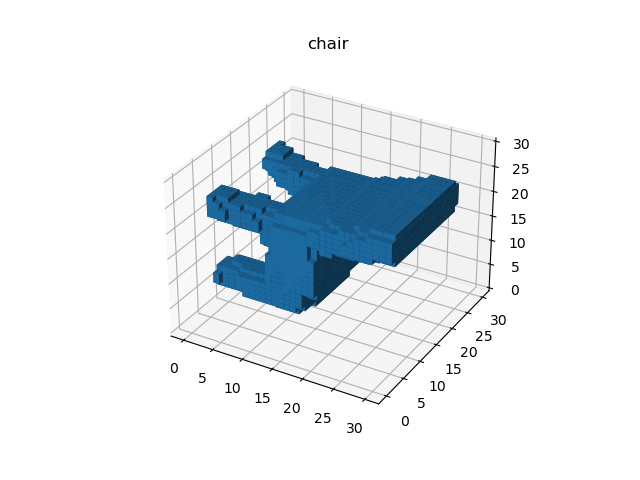

In [11]:
%matplotlib widget

i=1

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel_batch[i,0])
ax.set_title(int_to_label[label_batch[i].item()])
plt.show()

In [13]:
from torch.nn.functional import one_hot

one_hot(orientation_batch,num_classes=10*4)

tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [14]:
one_hot(label_batch,num_classes=10)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])